In [42]:
import pandas as pd

# Load CSV files
ev_maker_place = pd.read_csv('EV Maker by Place.csv')
ev_cat = pd.read_csv('ev_cat_01-24.csv')
ev_sales_by_makers_and_cat = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
operational_pc = pd.read_csv('OperationalPC.csv')
vehicle_class = pd.read_csv('Vehicle Class - All.csv')

In [43]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("sarthaknagpal1/indian-cities-vehicle-data")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\del\.cache\kagglehub\datasets\sarthaknagpal1\indian-cities-vehicle-data\versions\1


In [44]:
# Download dataset
path = kagglehub.dataset_download("praveenchoudhary1217/electric-vehicle-sales-in-india")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\del\.cache\kagglehub\datasets\praveenchoudhary1217\electric-vehicle-sales-in-india\versions\1


In [45]:
# Try using 'ISO-8859-1' encoding to read the file
vehicle_composition = pd.read_csv('india-composition-of-vehicle-population-as-of-march-2017.csv', encoding='ISO-8859-1')
registered_non_transport = pd.read_csv('total-registered-non-transport-vehicles-in-million-plus-cities-of-india-as-on-31st-march-2017.csv', encoding='ISO-8859-1')
production_data = pd.read_csv('category-wise-automobiles-production-in-india-2000-2016.csv', encoding='ISO-8859-1')


In [46]:
# Check the column names in your DataFrame
print(vehicle_composition.columns)

Index(['Year', 'Two Wheelers (as % age of total vehicle population)',
       'Cars, Jeeps & Taxis (as % age of total vehicle population)',
       'Buses (as % age of total vehicle population)',
       'Goods Vehicles (as % age of total vehicle population)',
       'Other Vehicles (as % age of total vehicle population)',
       'Total (Million)'],
      dtype='object')


In [47]:
# Drop rows with missing values in the 'Two Wheelers (as % age of total vehicle population)' column
vehicle_composition.dropna(subset=['Two Wheelers (as % age of total vehicle population)'], inplace=True)

In [48]:
# Preview the first few rows of the dataset
print(vehicle_composition.head())

   Year  Two Wheelers (as % age of total vehicle population)  \
0  1951                                                8.8     
1  1961                                               13.2     
2  1971                                               30.9     
3  1981                                               48.6     
4  1991                                               66.4     

   Cars, Jeeps & Taxis (as % age of total vehicle population)  \
0                                               52.0            
1                                               46.6            
2                                               36.6            
3                                               21.5            
4                                               13.8            

  Buses (as % age of total vehicle population)  \
0                                         11.1   
1                                          8.6   
2                                            5   
3                       

In [49]:
# Convert all values to numeric, coercing errors to NaN
features_numeric = features.apply(pd.to_numeric, errors='coerce')

# Check for NaN values
print(features_numeric.isnull().sum())

Two Wheelers (as % age of total vehicle population)           0
Cars, Jeeps & Taxis (as % age of total vehicle population)    0
Buses (as % age of total vehicle population)                  1
Goods Vehicles (as % age of total vehicle population)         0
Other Vehicles (as % age of total vehicle population)         1
dtype: int64


In [50]:
features_numeric = features_numeric.dropna()

In [51]:
features_numeric = features_numeric.fillna(features_numeric.mean())

In [52]:
# Standardize the features again after cleaning
scaled_features = scaler.fit_transform(features_numeric)

In [53]:
# Drop columns with non-numeric data
features_cleaned = features.drop(columns=['Buses (as % age of total vehicle population)', 
                                          'Other Vehicles (as % age of total vehicle population)'])

In [54]:
# Check if values in specific column are non-numeric (strings)
non_numeric_buses = features[features['Buses (as % age of total vehicle population)'].apply(lambda x: isinstance(x, str))]
print(non_numeric_buses)

non_numeric_other_vehicles = features[features['Other Vehicles (as % age of total vehicle population)'].apply(lambda x: isinstance(x, str))]
print(non_numeric_other_vehicles)

    Two Wheelers (as % age of total vehicle population)  \
0                                                8.80     
1                                               13.20     
2                                               30.90     
3                                               48.60     
4                                               66.40     
5                                               70.10     
6                                               70.60     
7                                               70.90     
8                                               71.40     
9                                               72.10     
10                                              72.20     
11                                              71.50     
12                                              71.50     
13                                              71.70     
14                                              71.70     
15                                              71.80   

In [55]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Use only numeric columns
features_numeric = features_cleaned.select_dtypes(include=['float64', 'int64'])

# Scale the features
scaled_features = scaler.fit_transform(features_numeric)

print(scaled_features[:5])  # Print first 5 rows of scaled data

[[-2.27456356  3.02401679  2.95700353]
 [-2.08113984  2.5551243   2.72768055]
 [-1.30304897  1.68680487  1.67279483]
 [-0.52495809  0.37564253  0.43445073]
 [ 0.25752878 -0.29296342 -0.17707722]]


In [56]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the features to 2 components (for visualization)
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_features = pca.fit_transform(scaled_features)

# Convert to a DataFrame for easier handling
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])

# Display the first few rows of the PCA-transformed data
print(pca_df.head())

       PCA1      PCA2
0  4.798324  0.179909
1  4.276090  0.083611
2  2.708250  0.077858
3  0.759885 -0.166012
4 -0.416167  0.047248


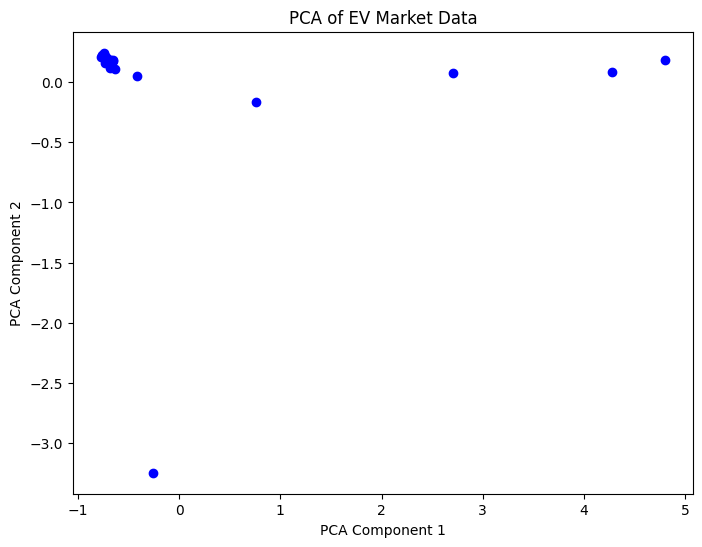

In [57]:
import matplotlib.pyplot as plt

# Plotting the PCA features
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], color='blue')
plt.title('PCA of EV Market Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

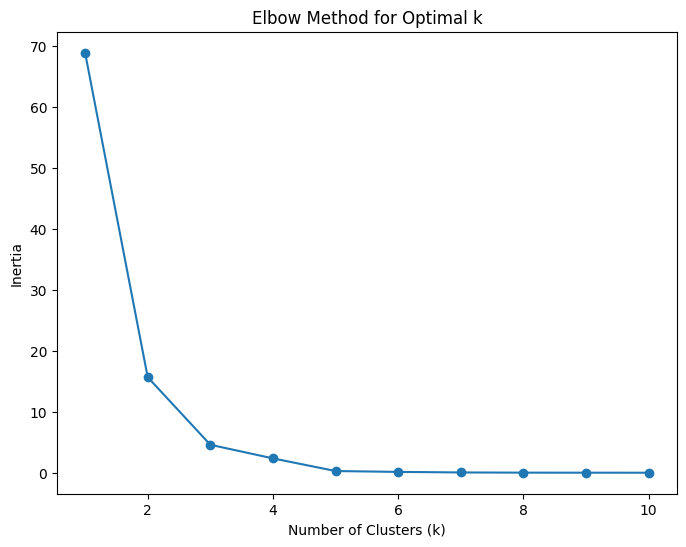

In [58]:
# Calculate the sum of squared distances for different values of k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia (sum of squared distances) for different k values
inertia = []
k_range = range(1, 11)  # We will check for k = 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

# Plot the inertia for each k
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [59]:
# Apply K-Means with the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3)  # Choose the optimal k
pca_df['Cluster'] = kmeans.fit_predict(pca_features)

# Display the first few rows with cluster labels
print(pca_df.head())

       PCA1      PCA2  Cluster
0  4.798324  0.179909        0
1  4.276090  0.083611        0
2  2.708250  0.077858        0
3  0.759885 -0.166012        1
4 -0.416167  0.047248        1


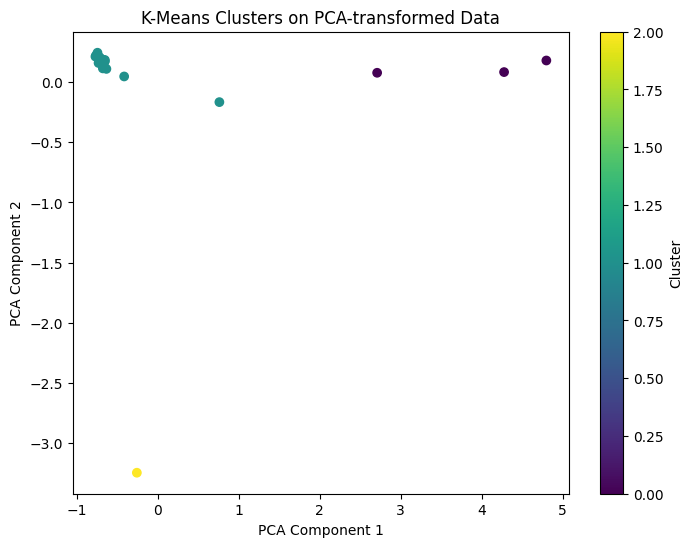

In [60]:
# Plot the clustered data
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('K-Means Clusters on PCA-transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [61]:
# Calculate the mean values for each cluster
cluster_profiles = pca_df.groupby('Cluster').mean()
print(cluster_profiles)

             PCA1      PCA2
Cluster                    
0        3.927555  0.113793
1       -0.606489  0.152900
2       -0.259381 -3.246476


In [62]:
# Assuming 'total_vehicle_population' contains the number of vehicles in each segment
# Example formula: Potential Sales = Target Customer Base * Target Price Range

target_price_range = 1000000  # Example price for EV
target_customer_base = 500000  # Example number of potential customers in the target segment

potential_profit = target_customer_base * target_price_range
print(f"Potential Profit in Early Market: {potential_profit}")

Potential Profit in Early Market: 500000000000
